In [15]:
import xarray as xr
import geopandas as gpd

## NetCDF4

### Old data (obtained in 2024)

In [6]:
# ncfile = "era5_nc_indonesia/20240517_204552_20161.nc"

# dataset = xr.load_dataset(ncfile, engine="netcdf4")
# df = dataset.to_dataframe().reset_index()
# df.head()

### Current data

In [7]:
# import cfgrib
# dataset = cfgrib.open_datasets("t2m_tp_indonesia.grib")
# dataset.


In [16]:
# ncfile = "t2m_tp_indonesia.nc4"
# dataset = xr.load_dataset(ncfile, engine="netcdf4")

ncfile = "/Users/yylab/ikkifik/research/era5-reanalysis/_archives/ofunato_t2m_tp.grib"
t2m_dataset = xr.open_dataset(ncfile, engine="cfgrib")
tp_dataset = xr.open_dataset(ncfile, engine="cfgrib", backend_kwargs={'filter_by_keys': {'shortName': 'tp'}})

skipping variable: paramId==228 shortName='tp'
Traceback (most recent call last):
  File "/Users/yylab/miniconda3/envs/exp/lib/python3.12/site-packages/cfgrib/dataset.py", line 726, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/Users/yylab/miniconda3/envs/exp/lib/python3.12/site-packages/cfgrib/dataset.py", line 642, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='time' value=Variable(dimensions=('time',), data=array([1577872800, 1577876400, 1577880000, ..., 1763733600, 1763737200,
       1763740800], shape=(15064,))) new_value=Variable(dimensions=('time',), data=array([1577858400, 1577944800, 1578031200, ..., 1763532000, 1763618400,
       1763704800], shape=(2152,)))


In [17]:
tp_df = tp_dataset.to_dataframe().reset_index()
# tp_gdf = gpd.GeoDataFrame(tp_df[['valid_time', 'tp']], geometry=gpd.points_from_xy(df.longitude,df.latitude))

t2m_df = t2m_dataset.to_dataframe().reset_index()
t2m_df['t2m'] = t2m_df['t2m'].apply(lambda c: c-273.15)
# t2m_gdf = gpd.GeoDataFrame(t2m_df[['valid_time', 't2m']], geometry=gpd.points_from_xy(df.longitude,df.latitude))


In [18]:
tp_df.head(3)

,time,step,latitude,longitude,number,surface,valid_time,tp
0,2020-01-01 06:00:00,0 days 04:00:00,39.505,141.0000,0,0.0,2020-01-01 10:00:00,0.000135
1,2020-01-01 06:00:00,0 days 04:00:00,39.505,141.2502,0,0.0,2020-01-01 10:00:00,0.000101
2,2020-01-01 06:00:00,0 days 04:00:00,39.505,141.5004,0,0.0,2020-01-01 10:00:00,0.000059


In [21]:
t2m_df.head(3)

,time,latitude,longitude,number,step,surface,valid_time,t2m
0,2020-01-01 10:00:00,39.505,141.0000,0,0 days,0.0,2020-01-01 10:00:00,-1.217017
1,2020-01-01 10:00:00,39.505,141.2502,0,0 days,0.0,2020-01-01 10:00:00,-2.085181
2,2020-01-01 10:00:00,39.505,141.5004,0,0 days,0.0,2020-01-01 10:00:00,-2.485327


In [22]:
t2m_df.tail(3)

,time,latitude,longitude,number,step,surface,valid_time,t2m
361533,2025-11-21 16:00:00,38.754,141.7506,0,0 days,0.0,2025-11-21 16:00:00,6.835107
361534,2025-11-21 16:00:00,38.754,142.0008,0,0 days,0.0,2025-11-21 16:00:00,8.128564
361535,2025-11-21 16:00:00,38.754,142.2510,0,0 days,0.0,2025-11-21 16:00:00,8.191797


In [12]:
import pandas as pd

# join = tp_df.join(t2m_df, lsuffix='_left', rsuffix='_right')
join = pd.merge(t2m_df, tp_df[['tp']], on=t2m_df.index, how='left')
join.head(2)

,key_0,time,latitude,longitude,number,step,surface,valid_time,t2m,tp
0,0,2024-06-01 13:00:00,-2.0,113.50,0,0 days,0.0,2024-06-01 13:00:00,27.228479,0.001488
1,1,2024-06-01 13:00:00,-2.0,113.75,0,0 days,0.0,2024-06-01 13:00:00,27.054651,0.000009


In [14]:
gdf = gpd.GeoDataFrame(
    join, geometry=gpd.points_from_xy(join.longitude, join.latitude), crs="EPSG:4326"
)
gdf.head(2)

,key_0,time,latitude,longitude,number,step,surface,valid_time,t2m,tp,geometry
0,0,2024-06-01 13:00:00,-2.0,113.50,0,0 days,0.0,2024-06-01 13:00:00,27.228479,0.001488,POINT (113.5 -2)
1,1,2024-06-01 13:00:00,-2.0,113.75,0,0 days,0.0,2024-06-01 13:00:00,27.054651,0.000009,POINT (113.75 -2)


In [ ]:
# spjoin2 = gpd.sjoin(tp_gdf, t2m_gdf, how="left", predicate="intersects").loc[
#     lambda d: d["valid_time_left"].eq(d["valid_time_right"])
# ]

# spjoin2 = spjoin2[["valid_time_left", "tp", "t2m", "geometry"]]
# spjoin2 = spjoin2.drop_duplicates()
# spjoin2 = spjoin2.reset_index()
# spjoin2

In [ ]:
# gdf = gpd.GeoDataFrame(df[['time', 't2m', 'tp']], geometry=gpd.points_from_xy(df.longitude,df.latitude))
# gdf = gdf.to_crs({'init': 'epsg:4326'})

In [ ]:
# spjoin2

In [ ]:
# import os
# from datetime import datetime

# gdf = gdf.set_crs('epsg:4326')

# # temperature(K) to celcius
# # gdf['t2m'] = gdf['t2m'].apply(lambda c: c-273.15)

# # Turn into raster data
# gdf["x"] = gdf["geometry"].x
# gdf["y"] = gdf["geometry"].y

# t2m = (gdf.set_index(["y", "x"]).t2m.to_xarray()).rio.set_crs(4326)
# tp = (gdf.set_index(["y", "x"]).tp.to_xarray()).rio.set_crs(4326)

# dir_path = os.path.join("temp_results", "raster")
# if not os.path.exists(dir_path):
#     os.makedirs(dir_path)

# t2m_path = os.path.join(dir_path, f"t2m_{datetime.strftime(datetime.now(), '%Y%m%d%H%M%S')}.TIF")
# t2m.rio.to_raster(t2m_path)

# tp_path = os.path.join(dir_path, f"tp_{datetime.strftime(datetime.now(), '%Y%m%d%H%M%S')}.TIF")
# tp.rio.to_raster(tp_path)

# doc = {
#     "t2m_path": str(t2m_path),
#     "tp_path": str(tp_path)
# }

ValueError: cannot convert a DataFrame with a non-unique MultiIndex into xarray

### Himawari data (need further exploration)

In [ ]:
# ncfile = "../_dataset/himawari2/NC_H08_20151002_0100_L2ARP010_FLDK.02401_02401.nc"
# # ncfile = "era5_nc_indonesia/20240517_204552_20161.nc"

# dataset = xr.load_dataset(ncfile, engine="netcdf4", decode_timedelta=True)
# df = dataset.to_dataframe().reset_index()
# df.head()

,latitude,longitude,AE,AOT,Hour,AOT_uncertainty,QA_flag,RF,SSA
0,60.0,80.000000,NaN,NaN,0 days 01:00:49.580526351,NaN,1532,NaN,NaN
1,60.0,80.050003,NaN,NaN,0 days 01:00:49.580526351,NaN,1532,NaN,NaN
2,60.0,80.099998,NaN,NaN,0 days 01:00:49.580526351,NaN,1532,NaN,NaN
3,60.0,80.150002,NaN,NaN,0 days 01:00:49.580526351,NaN,1532,NaN,NaN
4,60.0,80.199997,NaN,NaN,0 days 01:00:49.580526351,NaN,1532,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5764801 entries, 0 to 5764800
Data columns (total 9 columns):
 #   Column           Dtype          
---  ------           -----          
 0   latitude         float32        
 1   longitude        float32        
 2   AE               float32        
 3   AOT              float32        
 4   Hour             timedelta64[ns]
 5   AOT_uncertainty  float32        
 6   QA_flag          int16          
 7   RF               float32        
 8   SSA              float32        
dtypes: float32(7), int16(1), timedelta64[ns](1)
memory usage: 208.9 MB


In [ ]:
# df = dataset.to_dataframe().reset_index()
# gdf = gpd.GeoDataFrame(df[['time', 't2m', 'tp']], geometry=gpd.points_from_xy(df.longitude,df.latitude))
# # gdf = gdf.to_crs({'init': 'epsg:4326'})
# gdf = gdf.set_crs('epsg:4326')

# # temperature(K) to celcius
# gdf['t2m'] = gdf['t2m'].apply(lambda c: c-273.15)

## GRIB

In [ ]:
# import xarray as xr
# import matplotlib.pyplot as plt
# %matplotlib inline

In [ ]:
# !pip install cfgrib

**2m Temperature (K)**  
This parameter is the temperature of air at 2m above the surface of land, sea or inland waters. 2m temperature is calculated by interpolating between the lowest model level and the Earth's surface, taking account of the atmospheric conditions. This parameter has units of kelvin (K). Temperature measured in kelvin can be converted to degrees Celsius (°C) by subtracting 273.15.

In [ ]:
# ds = xr.load_dataset("t2m_tp_indonesia.grib", engine="cfgrib")

skipping variable: paramId==228 shortName='tp'
Traceback (most recent call last):
  File "/Users/yylab/miniconda3/envs/exp/lib/python3.12/site-packages/cfgrib/dataset.py", line 726, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/Users/yylab/miniconda3/envs/exp/lib/python3.12/site-packages/cfgrib/dataset.py", line 642, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='time' value=Variable(dimensions=('time',), data=array([1717246800, 1717333200, 1717419600, 1717506000, 1717592400,
       1717678800, 1717765200, 1717851600, 1717938000, 1718024400,
       1718110800, 1718197200, 1718283600, 1718370000, 1718456400,
       1718542800, 1718629200, 1718715600, 1718802000, 1718888400,
       1718974800, 1719061200, 1719147600, 1719234000, 1719320400,
       1719406800, 1719493200, 1719579600, 1719666000, 1719752400,
       1719838800, 1719925200, 1720011600, 1720098000, 1720184400,
       172027

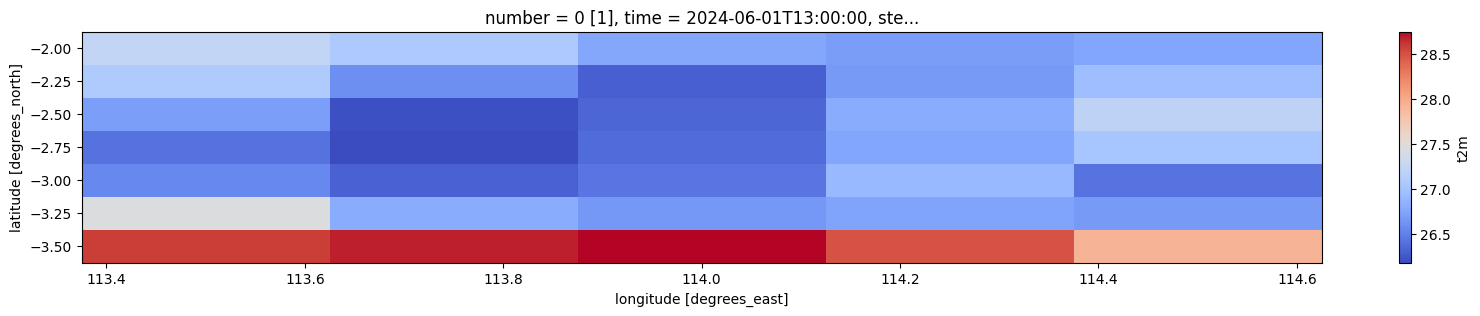

In [ ]:
# ds = ds - 273.15
# ds.t2m[0].plot(cmap=plt.cm.coolwarm)

Text(0.5, 1.0, 'ERA5 - Indonesia 2m temperature June-Sept 2024')

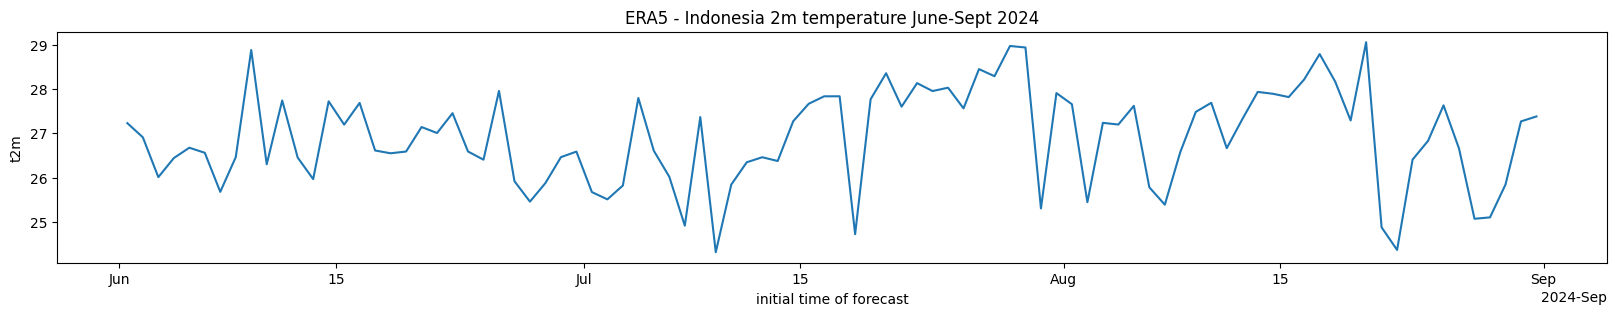

In [ ]:
# ds.t2m.sel(longitude=0, latitude=51.5, method='nearest').plot()
# plt.rcParams["figure.figsize"] = (20,3)
# plt.title("ERA5 - Indonesia 2m temperature June-Aug 2024")

In [ ]:
# df = ds.to_dataframe().reset_index()
# gdf = gpd.GeoDataFrame(df[['time', 't2m']], geometry=gpd.points_from_xy(df.longitude,df.latitude))
# # gdf = gdf.to_crs({'init': 'epsg:4326'})
# gdf = gdf.set_crs('epsg:4326')

# # temperature(K) to celcius
# gdf['t2m'] = gdf['t2m'].apply(lambda c: c-273.15)

In [ ]:
gdf.head()

,time,t2m,geometry
0,2024-06-01 13:00:00,-245.921515,POINT (113.5 -2)
1,2024-06-01 13:00:00,-246.095343,POINT (113.75 -2)
2,2024-06-01 13:00:00,-246.394171,POINT (114 -2)
3,2024-06-01 13:00:00,-246.466437,POINT (114.25 -2)
4,2024-06-01 13:00:00,-246.398077,POINT (114.5 -2)


In [ ]:
# import numpy as np
# plt.plot(gdf['time'], gdf['t2m'])
# plt.rcParams["figure.figsize"] = (20,3)
# plt.xticks(gdf['time'], rotation=90)

In [ ]:
ds

<xarray.Dataset> Size: 14kB
Dimensions:     (time: 92, latitude: 7, longitude: 5)
Coordinates:
  * time        (time) datetime64[ns] 736B 2024-06-01T13:00:00 ... 2024-08-31...
  * latitude    (latitude) float64 56B -2.0 -2.25 -2.5 -2.75 -3.0 -3.25 -3.5
  * longitude   (longitude) float64 40B 113.5 113.8 114.0 114.2 114.5
    number      int64 8B 0
    step        timedelta64[ns] 8B 00:00:00
    surface     float64 8B 0.0
    valid_time  (time) datetime64[ns] 736B 2024-06-01T13:00:00 ... 2024-08-31...
Data variables:
    t2m         (time, latitude, longitude) float32 13kB 27.23 27.05 ... 27.85
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-10-31T07:59 GRIB to CDM+CF via cfgrib-0.9.1...